<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/test_ixpe_file_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the ixpe_file_model module

Requirements:

* [IXPEObsSim](https://bitbucket.org/ixpesw/ixpeobssim/src/master/)
* Python
* [PyXSPEC](https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/index.html)
* [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface)

Documentation for IXPEObsSim:

https://cocalc.coolpulsars.org/636f9d55-17fa-4cc0-bb9c-ec4e36690581/raw/Neutron-Star-Atmosphere/ixpesw-ixpeobssim-572fa0092131/docs/_build/singlehtml/index.html#document-index

Similar documentation for XIMPOL:

https://buildmedia.readthedocs.org/media/pdf/ximpol/stable/ximpol.pdf

xwiki:

http://xwiki.ssdc.asi.it/xwiki/bin/view/Main/

Bitbucket:

https://bitbucket.org/ixpesw/ixpeobssim/src/master/


## Setting up the ixpe_file_model module


1.   You can find the [ixpe_file_model.py](https://github.com/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/config/ixpe_file_model.py) file in the [config](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config) directory in the [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface) repository.
2.   You should make a copy the ixpe_file_model module to create a configuration file for your particular source.  
3. All of the key parameters are defined located at the top of the module.
4. At a minimum, you must define the following parametrers:
* Position of the source: `ra`, `dec`.
* Spin frequency, frequency first and second derivative: `nu0`, `nudot`, `nuddot`.
* File with spectral and polarization data: filename.
* Magnetic dipole geometry: `alpha` and `beta.
5. There are a few optional parameters:
* You can renormalize the phase-averaged flux before absorption to have a fixed value or to follow a given spectrum with the `normflux` parameter.  `normflux` can be a floating point number, an array of values corresponding to the energies listed in `filename`, a function or filename.
* You can apply interstellar absorption with the `NH` parameter.  `NH` can be a floating point number for the hydrogen column density or a string with a floating point number and filename: e.g. `"1e22;tbabs.dat"`. 
* You can also normalize the phase-average flux after absorption with the finalnorm parameter.
* As final step, the module assumes that your spectrum is in the units of counts/s/cm<sup>2</sup>/keV.  If it is in erg/s/cm<sup>2</sup>/keV, set `intensity_energy_units=True`, and it will perform the needed conversion.
6. The various files should be in the [config/ascii](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config/ascii) directory.
7. The file that contains the spectral and polarization information (`filename`) must contain the following information with a header row at the top.
* Angle between the line of sight and the magnetic axis in radians: `Phi[rad]`
* Energy of radiation: `Energy[keV]`
* Intensity or flux: `I`
* Polarization with respect to the magnetic axis projected into the sky: `Q/I`

This file can contain other information, and the row and columns can be in any order.  The values of the angle and the energy must form a rectangular grid.
8. The file that contains the spectral renormalization information (`normflux`) must contain the following information with a header row at the top.
* Energy of radiation: `Energy[keV]`
* Flux: `I`
9. The file that contains the absoprtion cross section as a function of energy as defined in `NH` must contain the following information with a header row at the top.
* Energy of radiation in keV: `Energy`
* Cross section times <i>E</i><sup>3</sup> in units of 10<sup>-24</sup> cm<sup>2</sup> keV<sup>3</sup>: `sigma`.


## Components within the ixpe_file_model module

You can access all of the a forementioned parameters from outside the module as `ixpe_file_model.ra` for example.  There are many additional components defined with energy `E` in keV, inclination `i` in radians, phase `t` from 0 to 1:

* `energy_spectrum_inclination(E,i)`
* `ratio_inclination(E,i)`
* ` pol_deg(E, t, ra=None, dec=None)`
* `pol_ang(E, t, ra=None, dec=None)` in radians
* `rawspec(E,t)`: unabsorbed spectrum before renormalization
* `spec(E,t)`: absorbed counts spectrum after renormalization



 

## Load libraries

In [1]:
import os     
import numpy
import matplotlib.pyplot as plt
from ixpeobssim import IXPEOBSSIM_CONFIG, IXPEOBSSIM_DATA, IXPEOBSSIM_DOC
import ixpeobssim.core.pipeline as pipeline
from ixpeobssim.utils.logging_ import logger

## Load the model

Double_Blackbody.txt


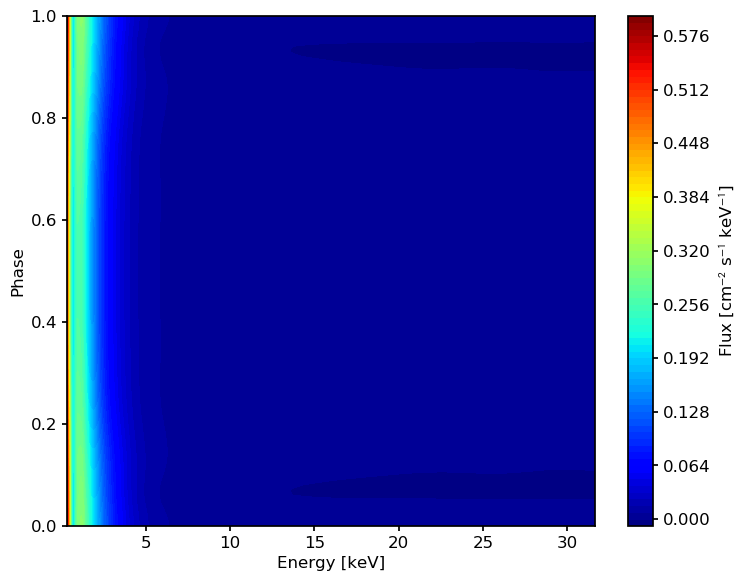

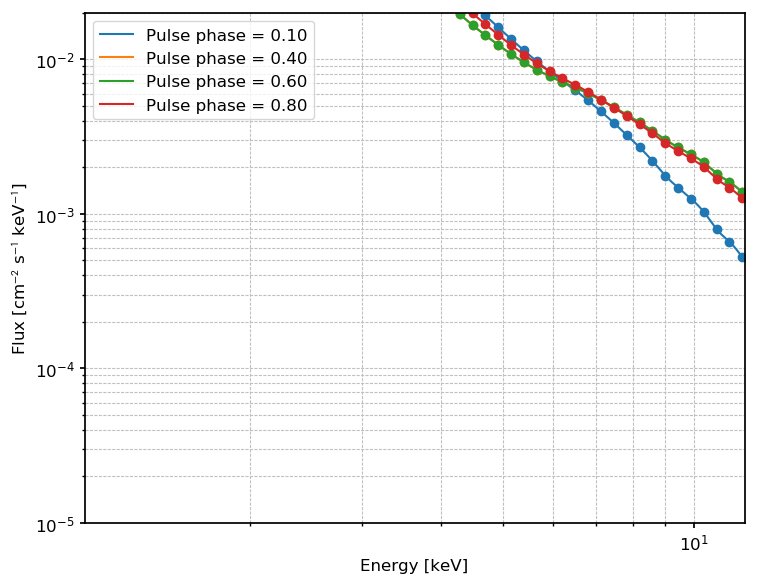

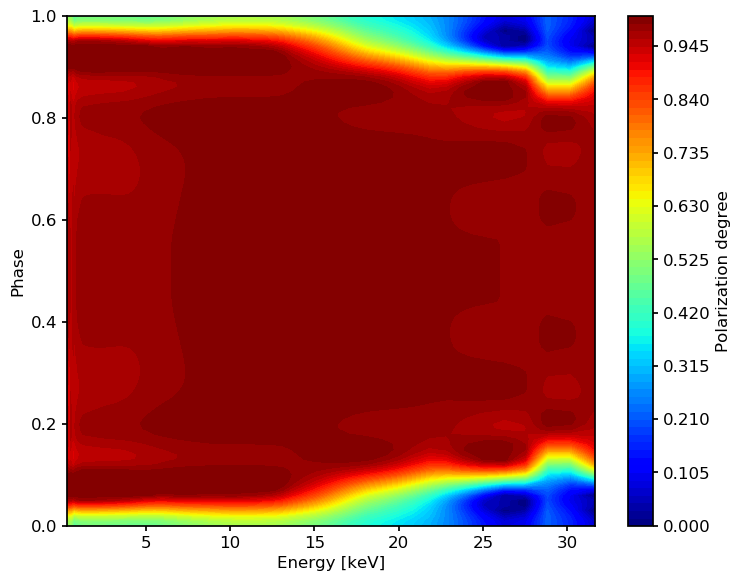

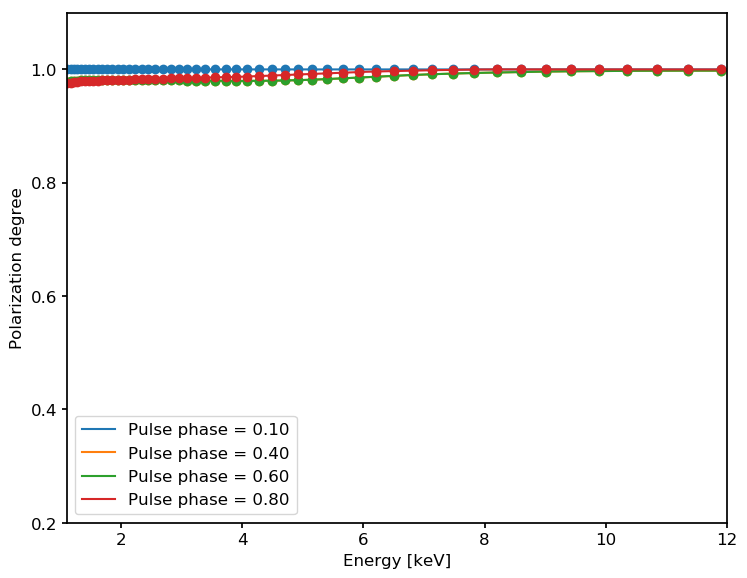

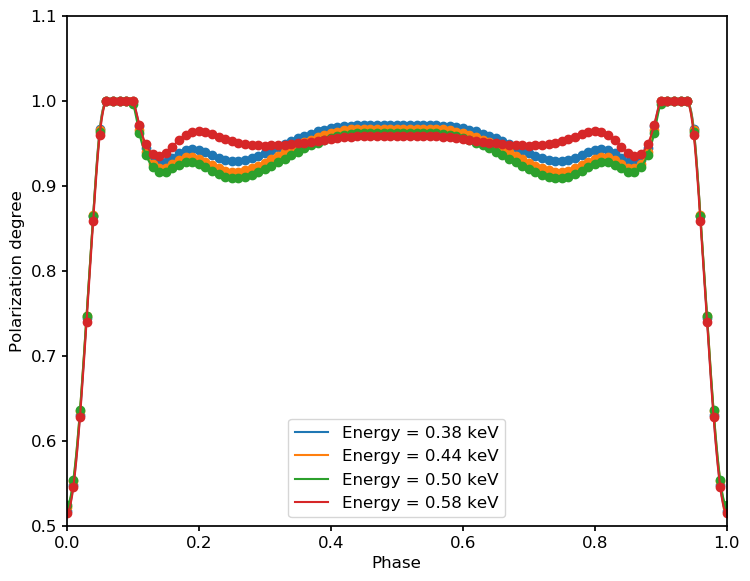

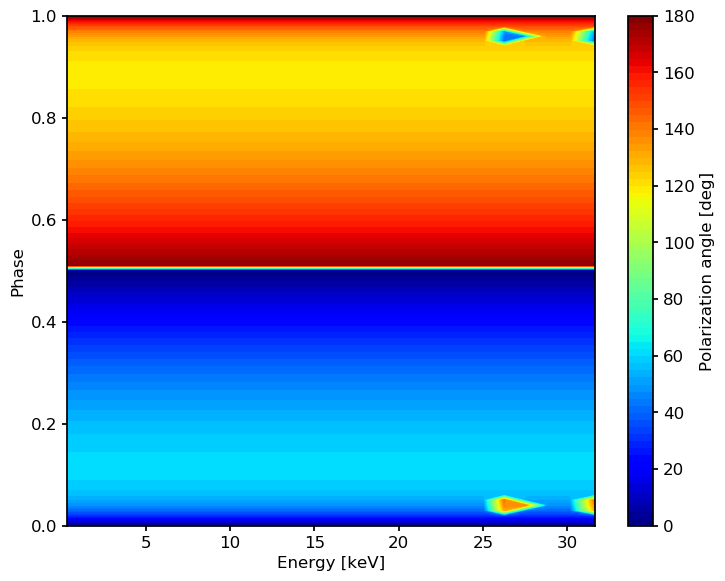

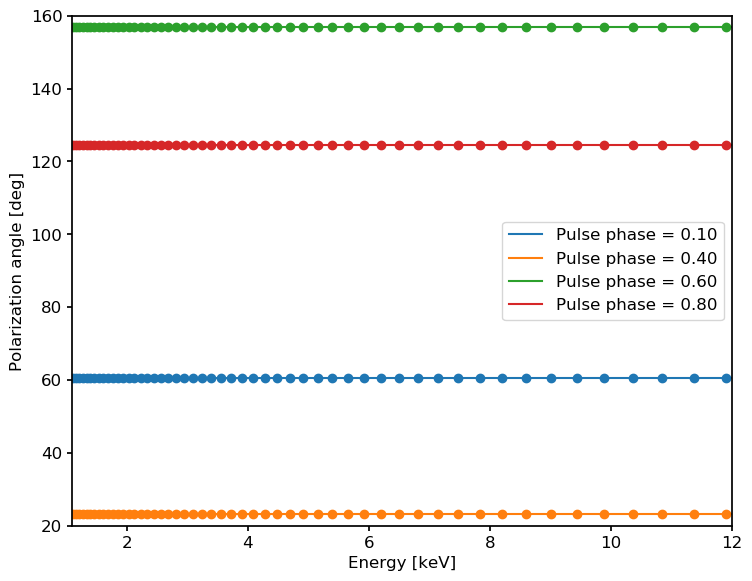

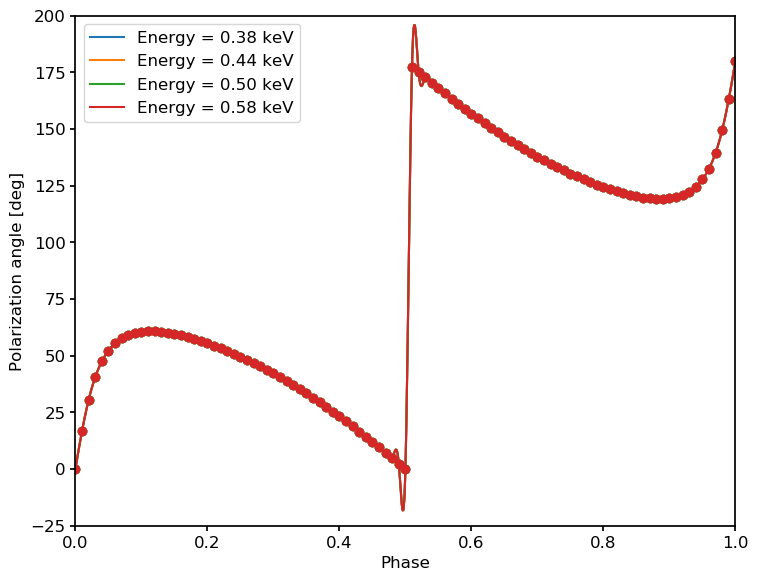

In [2]:
import ixpeobssim.config.ixpe_file_model as magnetar
print(magnetar.filename)
magnetar.display()

## Display the model

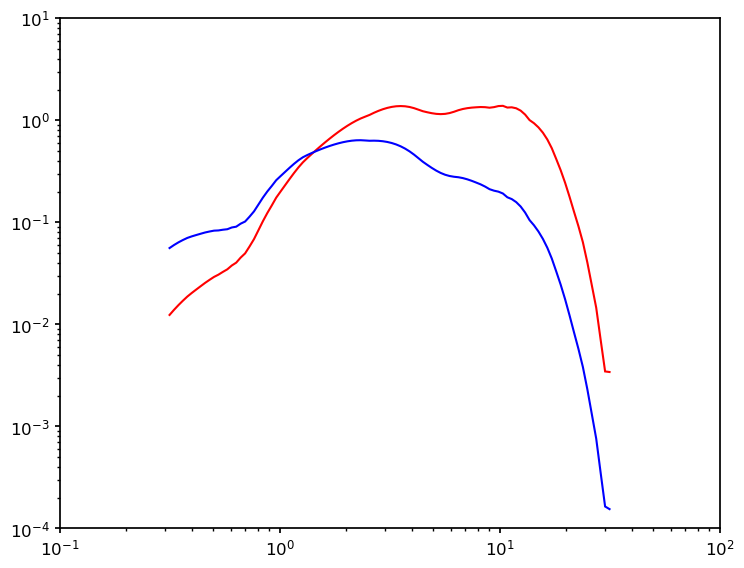

In [3]:
mfl=numpy.mean(magnetar.flux,axis=-1)
plt.loglog(magnetar.enerlist,magnetar.enerlist**2*magnetar.meanflux/1e4,'r')
plt.loglog(magnetar.enerlist,magnetar.enerlist**2*mfl,'b')


## Configure the simulation.

In [4]:
head,cfile=os.path.split(magnetar.__file__)
CFG_FILE = os.path.join(IXPEOBSSIM_CONFIG, cfile)
OUT_FILE_PATH_BASE = os.path.join(IXPEOBSSIM_DATA, os.path.splitext(cfile)[0])
EVT_FILE_PATH = '%s.fits' % OUT_FILE_PATH_BASE
SIM_DURATION = 100000.
OUTPUT_FOLDER = os.path.join(IXPEOBSSIM_DOC, 'figures', 'showcase')


## Perform the simulation

In [5]:
EVT_FILE_PATH = pipeline.xpobssim(configfile=CFG_FILE, duration=SIM_DURATION)

>>> Setting output file base name to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model...


>>> Setting up the source model...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> ROI centered at (26.5934, 61.7509):
- xPeriodicPointSource "4U 0142+61" (id = 0)
    Galactic column density: 0.000e+00 cm^{-2}
    Redshift: 0.000
    Unabsorbed flux @ t = 0: 1.311e-09 erg/cm2/s (65.56 mcrab)
    Position: RA = 26.5933625 deg, Dec = 61.7508861111 deg
    Ephemeris: t0 = 0.0 s, nu0 = 0.11509211554 Hz, nudot = -2.6783806e-14 Hz/s, nuddot = 0.0 Hz/s^2


>>> Done [t0 + 0.240 s].


>>> Setting the random seed to 3585605095...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.062931', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.062931', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu1vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.245255', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.245255', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu1stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.256145', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.256145', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu1psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.525812', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.525812', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 1.039 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 635209 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 635209/635209 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.121 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 635209/635209 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.048 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 630845/635209 (99.31%) events remaining, deadtime correction 0.993.


>>> Running time for apply_dead_time(): 0.271 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   630845R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   630845R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


>>> Done for detector unit # 1 [t0 + 9.419 s].


>>> Setting the random seed to 3585605096...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.567382', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.567382', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu2vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.579084', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.579084', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu2stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.588949', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.588949', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu2psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.854799', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.854799', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 10.284 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 636323 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 636323/636323 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.113 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 636323/636323 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.024 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 631882/636323 (99.30%) events remaining, deadtime correction 0.993.


>>> Running time for apply_dead_time(): 0.417 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   631882R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   631882R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


>>> Done for detector unit # 2 [t0 + 18.771 s].


>>> Setting the random seed to 3585605097...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu3stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu3stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.896001', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu3vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.896001', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu3vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu3vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.907723', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu3stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.907723', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu3stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu3stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.917267', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu3psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.917267', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu3psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu3psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.187659', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.187659', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 19.647 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 634853 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 634853/634853 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.148 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 634853/634853 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.026 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 630451/634853 (99.31%) events remaining, deadtime correction 0.993.


>>> Running time for apply_dead_time(): 0.345 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   630451R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   630451R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Done for detector unit # 3 [t0 + 28.123 s].


>>> All done [t0 + 28.124 s]!


In [6]:
EVT_FILE_PATH

['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits']

# Basic Analysis

## Generate a count map and plot it

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   630845R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631882R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   630451R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


INFO: Auto-setting vmin to -4.585e+03 [aplpy.core]
INFO: Auto-setting vmax to  5.090e+04 [aplpy.core]


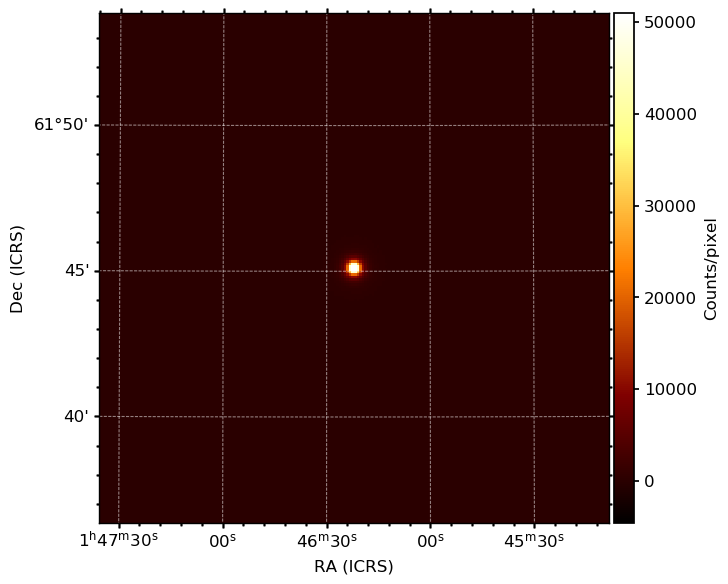

In [7]:

from ixpeobssim.evt.binning import xBinnedMap
 
cmap_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='CMAP')
count_map = xBinnedMap.from_file_list(cmap_file_list)
count_map.plot()


## Generate a light curve

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   630845R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631882R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   630451R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


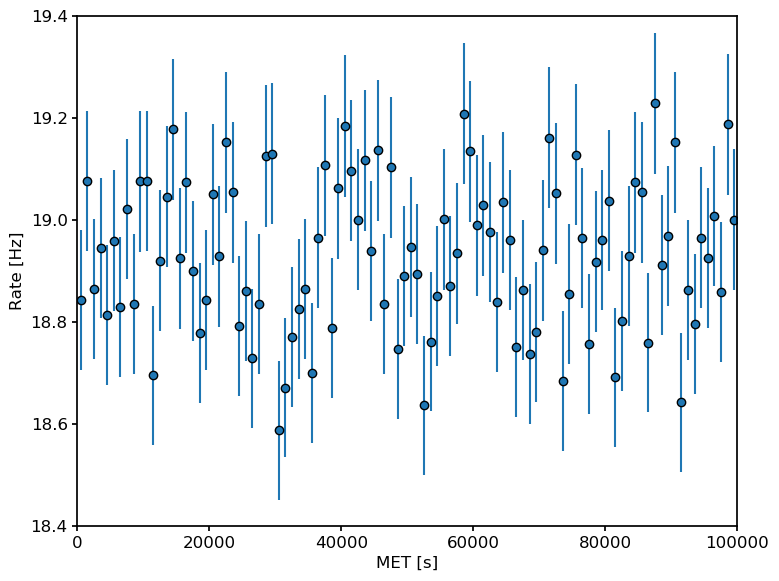

In [8]:
from ixpeobssim.evt.binning import xBinnedLightCurve

lc_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='LC')
count_lc = xBinnedLightCurve.from_file_list(lc_file_list)
count_lc.plot()

## Generate a spectrum

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   630845R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631882R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   630451R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


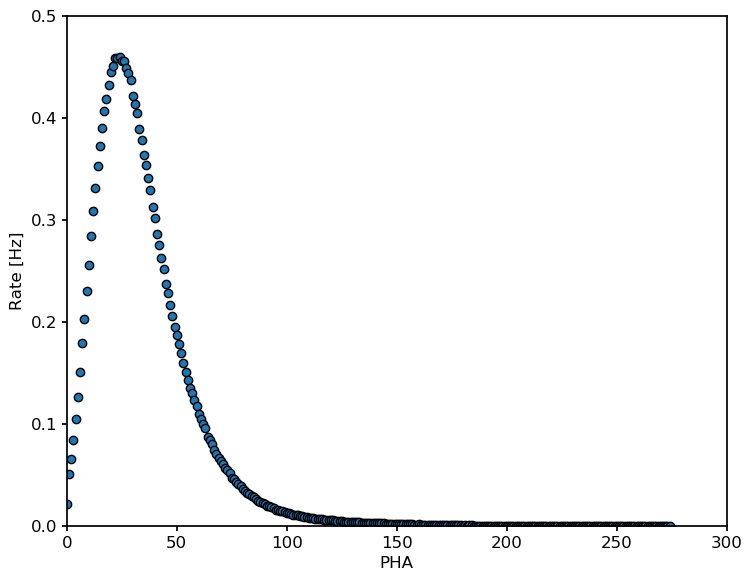

In [9]:
from ixpeobssim.evt.binning import xBinnedCountSpectrum

pha1_file_path = pipeline.xpbin(*EVT_FILE_PATH, algorithm='PHA1')
pha1_data = xBinnedCountSpectrum.from_file_list(pha1_file_path)
pha1_data.plot()


# Pulse Folding

## Calculate phases

In [10]:
folded_EVT_FILE_PATH=pipeline.xptimetophase(*EVT_FILE_PATH, configfile=CFG_FILE,suffix='folded')

>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits"...


>>> Creating phase column...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Done!


## Plot the pulse profile

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


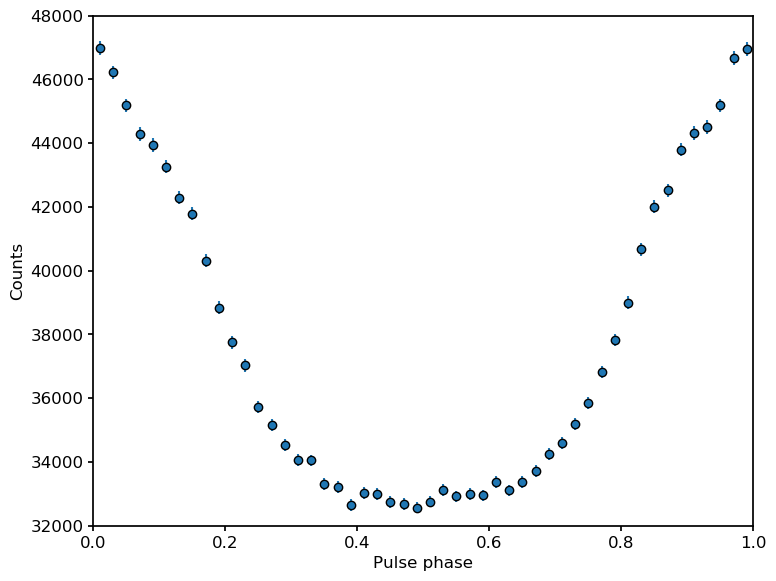

In [11]:
from ixpeobssim.evt.binning import xBinnedPulseProfile

prof_file_path = pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='PP')
prof_data = xBinnedPulseProfile.from_file_list(prof_file_path)
prof_data.plot()


# Look at polarization    

## Divide events in phase bins

In [12]:
from ixpeobssim.evt.binning import pairwise_enum
PHASE_BINNING = numpy.concatenate((numpy.linspace(0,0.2,11),numpy.linspace(0.3,0.7,11),numpy.linspace(0.8,1.0,11)))

for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
        pipeline.xpselect(*folded_EVT_FILE_PATH, phasemin=min_, phasemax=max_,
                          suffix=pipeline.suffix('phase', i),overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits'}...


>>> Done, 15673 events out of 630845 left.


>>> Filtering in place event file (15673 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15673R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15673R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits'}...


>>> Done, 15672 events out of 631882 left.


>>> Filtering in place event file (15672 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15672R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15672R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits'}...


>>> Done, 15638 events out of 630451 left.


>>> Filtering in place event file (15638 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15638R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15638R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits'}...


>>> Done, 15445 events out of 630845 left.


>>> Filtering in place event file (15445 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15445R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15445R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits'}...


>>> Done, 15520 events out of 631882 left.


>>> Filtering in place event file (15520 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15520R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15520R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits'}...


>>> Done, 15256 events out of 630451 left.


>>> Filtering in place event file (15256 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15256R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15256R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...


>>> Setting ra to 26.5933625...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60251R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', '…

>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits'}...


>>> Done, 60239 events out of 630451 left.


>>> Filtering in place event file (60239 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60239R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60239R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits'}...


>>> Done, 22745 events out of 630845 left.


>>> Filtering in place event file (22745 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22745R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22745R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits'}...


>>> Done, 22646 events out of 631882 left.


>>> Filtering in place event file (22646 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22646R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22646R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits'}...


>>> Done, 22711 events out of 630451 left.


>>> Filtering in place event file (22711 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22711R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22711R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits'}...


>>> Done, 22044 events out of 630845 left.


>>> Filtering in place event file (22044 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22044R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22044R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits'}...


>>> Done, 22492 events out of 631882 left.


>>> Filtering in place event file (22492 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22492R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22492R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits'}...


>>> Done, 22002 events out of 630451 left.


>>> Filtering in place event file (22002 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22002R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22002R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits'}...


>>> Done, 22024 events out of 630845 left.


>>> Filtering in place event file (22024 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22024R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22024R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits'}...


>>> Done, 21757 events out of 631882 left.


>>> Filtering in place event file (21757 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21757R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21757R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits'}...


>>> Done, 21903 events out of 630451 left.


>>> Filtering in place event file (21903 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21903R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21903R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits'}...


>>> Done, 21730 events out of 630845 left.


>>> Filtering in place event file (21730 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21730R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21730R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits'}...


>>> Done, 21909 events out of 631882 left.


>>> Filtering in place event file (21909 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21909R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21909R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits'}...


>>> Done, 22109 events out of 630451 left.


>>> Filtering in place event file (22109 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22109R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22109R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits'}...


>>> Done, 21656 events out of 630845 left.


>>> Filtering in place event file (21656 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21656R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21656R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits'}...


>>> Done, 21918 events out of 631882 left.


>>> Filtering in place event file (21918 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21918R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21918R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits'}...


>>> Done, 21677 events out of 630451 left.


>>> Filtering in place event file (21677 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21677R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21677R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits'}...


>>> Done, 21853 events out of 630845 left.


>>> Filtering in place event file (21853 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21853R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21853R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits'}...


>>> Done, 22074 events out of 631882 left.


>>> Filtering in place event file (22074 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22074R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22074R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits'}...


>>> Done, 21957 events out of 630451 left.


>>> Filtering in place event file (21957 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21957R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21957R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits'}...


>>> Done, 22171 events out of 630845 left.


>>> Filtering in place event file (22171 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22171R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22171R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits'}...


>>> Done, 21867 events out of 631882 left.


>>> Filtering in place event file (21867 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21867R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21867R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits'}...


>>> Done, 21885 events out of 630451 left.


>>> Filtering in place event file (21885 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21885R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21885R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits'}...


>>> Done, 22073 events out of 630845 left.


>>> Filtering in place event file (22073 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22073R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22073R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits'}...


>>> Done, 22192 events out of 631882 left.


>>> Filtering in place event file (22192 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22192R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22192R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits'}...


>>> Done, 22057 events out of 630451 left.


>>> Filtering in place event file (22057 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22057R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22057R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits'}...


>>> Done, 22220 events out of 630845 left.


>>> Filtering in place event file (22220 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22220R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22220R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits'}...


>>> Done, 22357 events out of 631882 left.


>>> Filtering in place event file (22357 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22357R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22357R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits'}...


>>> Done, 21901 events out of 630451 left.


>>> Filtering in place event file (21901 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21901R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21901R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits'}...


>>> Done, 22750 events out of 630845 left.


>>> Filtering in place event file (22750 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22750R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22750R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits'}...


>>> Done, 22482 events out of 631882 left.


>>> Filtering in place event file (22482 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22482R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22482R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits'}...


>>> Done, 22731 events out of 630451 left.


>>> Filtering in place event file (22731 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22731R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22731R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits'}...


>>> Done, 60297 events out of 630845 left.


>>> Filtering in place event file (60297 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60297R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60297R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits'}...


>>> Done, 60076 events out of 631882 left.


>>> Filtering in place event file (60076 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60076R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60076R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits'}...


>>> Done, 59925 events out of 630451 left.


>>> Filtering in place event file (59925 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   59925R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   59925R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits'}...


>>> Done, 12967 events out of 630845 left.


>>> Filtering in place event file (12967 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12967R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12967R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits'}...


>>> Done, 13129 events out of 631882 left.


>>> Filtering in place event file (13129 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13129R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13129R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits'}...


>>> Done, 12907 events out of 630451 left.


>>> Filtering in place event file (12907 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12907R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12907R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits'}...


>>> Done, 13649 events out of 630845 left.


>>> Filtering in place event file (13649 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13649R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13649R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits'}...


>>> Done, 13528 events out of 631882 left.


>>> Filtering in place event file (13528 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13528R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13528R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits'}...


>>> Done, 13489 events out of 630451 left.


>>> Filtering in place event file (13489 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13489R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13489R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits'}...


>>> Done, 13992 events out of 630845 left.


>>> Filtering in place event file (13992 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13992R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13992R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits'}...


>>> Done, 14079 events out of 631882 left.


>>> Filtering in place event file (14079 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14079R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14079R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits'}...


>>> Done, 13938 events out of 630451 left.


>>> Filtering in place event file (13938 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13938R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13938R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits'}...


>>> Done, 14098 events out of 630845 left.


>>> Filtering in place event file (14098 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14098R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14098R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits'}...


>>> Done, 14277 events out of 631882 left.


>>> Filtering in place event file (14277 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14277R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14277R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits'}...


>>> Done, 14144 events out of 630451 left.


>>> Filtering in place event file (14144 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14144R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14144R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits'}...


>>> Done, 14664 events out of 630845 left.


>>> Filtering in place event file (14664 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14664R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14664R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits'}...


>>> Done, 14540 events out of 631882 left.


>>> Filtering in place event file (14540 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14540R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14540R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits'}...


>>> Done, 14591 events out of 630451 left.


>>> Filtering in place event file (14591 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14591R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14591R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits'}...


>>> Done, 14792 events out of 630845 left.


>>> Filtering in place event file (14792 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14792R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14792R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits'}...


>>> Done, 14628 events out of 631882 left.


>>> Filtering in place event file (14628 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14628R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14628R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits'}...


>>> Done, 14899 events out of 630451 left.


>>> Filtering in place event file (14899 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14899R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14899R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits'}...


>>> Done, 15017 events out of 630845 left.


>>> Filtering in place event file (15017 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15017R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15017R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits'}...


>>> Done, 14549 events out of 631882 left.


>>> Filtering in place event file (14549 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14549R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14549R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits'}...


>>> Done, 14937 events out of 630451 left.


>>> Filtering in place event file (14937 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14937R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14937R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits'}...


>>> Done, 15107 events out of 630845 left.


>>> Filtering in place event file (15107 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15107R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15107R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits'}...


>>> Done, 15090 events out of 631882 left.


>>> Filtering in place event file (15090 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15090R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15090R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits'}...


>>> Done, 14988 events out of 630451 left.


>>> Filtering in place event file (14988 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14988R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14988R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits'}...


>>> Done, 15531 events out of 630845 left.


>>> Filtering in place event file (15531 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15531R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15531R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits'}...


>>> Done, 15609 events out of 631882 left.


>>> Filtering in place event file (15609 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15609R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15609R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits'}...


>>> Done, 15529 events out of 630451 left.


>>> Filtering in place event file (15529 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15529R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15529R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits'}...


>>> Done, 15665 events out of 630845 left.


>>> Filtering in place event file (15665 out of 630845 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15665R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15665R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits'}...


>>> Done, 15601 events out of 631882 left.


>>> Filtering in place event file (15601 out of 631882 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15601R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15601R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits'}...


>>> Done, 15690 events out of 630451 left.


>>> Filtering in place event file (15690 out of 630451 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15690R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15690R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


## Generate MCUBE files

This contain the Stokes parameters for each energy and phase bin.

In [13]:
ENERGY_BINNING = numpy.array([2., 4., 8.])


for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]
    pipeline.xpbin(*file_list, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING,overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15673R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15673R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15672R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15672R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15638R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15638R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15445R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15445R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15520R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15520R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15256R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15256R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14884R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14884R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   59725R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   59725R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60251R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60251R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60239R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60239R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22745R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22745R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22646R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22646R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22711R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22711R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22044R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22044R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22492R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22492R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22002R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22002R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22024R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22024R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21757R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21757R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21903R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21903R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21730R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21730R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21909R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21909R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22109R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22109R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21656R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21656R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21918R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21918R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21677R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21677R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21853R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21853R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22074R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22074R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21957R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21957R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22171R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22171R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21867R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21867R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21885R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21885R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22073R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22073R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22192R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22192R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22057R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22057R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22220R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22220R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21901R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21901R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22750R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22750R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22482R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22482R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22731R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22731R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60297R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60297R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60076R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60076R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   59925R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   59925R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12967R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12967R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13129R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13129R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12907R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12907R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13649R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13649R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13528R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13528R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13489R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13489R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13992R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13992R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14079R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14079R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13938R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13938R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14098R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14098R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14277R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14277R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14144R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14144R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14664R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14664R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14540R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14540R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14591R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14591R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14792R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14792R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14628R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14628R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14899R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14899R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15017R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15017R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14549R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14549R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14937R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14937R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15107R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15107R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15090R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15090R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14988R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14988R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15531R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15531R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15609R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15609R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15529R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15529R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15665R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15665R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15601R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15601R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15690R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15690R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


## Load the MCUBE data into Python

In [14]:
from ixpeobssim.evt.binning import xEventBinningBase, xBinnedModulationCube  

phase = numpy.linspace(0., 1., 100)
phase_bins = xEventBinningBase.bin_centers(PHASE_BINNING)
shape = (len(ENERGY_BINNING) - 1, len(PHASE_BINNING) - 1)
pol_deg = numpy.zeros(shape)
pol_deg_err = numpy.zeros(shape)
pol_ang = numpy.zeros(shape)
pol_ang_err = numpy.zeros(shape)
emean = numpy.zeros(shape)
for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d_mcube.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]

    mcube = xBinnedModulationCube.from_file_list(file_list)
    pol_deg[:,i] = mcube.pol_deg
    pol_deg_err[:,i] = mcube.pol_deg_err
    pol_ang[:,i] = mcube.pol_ang
    pol_ang_err[:,i] = mcube.pol_ang_err
    emean[:,i] = mcube.energy_mean


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


## Plot the polarization degree

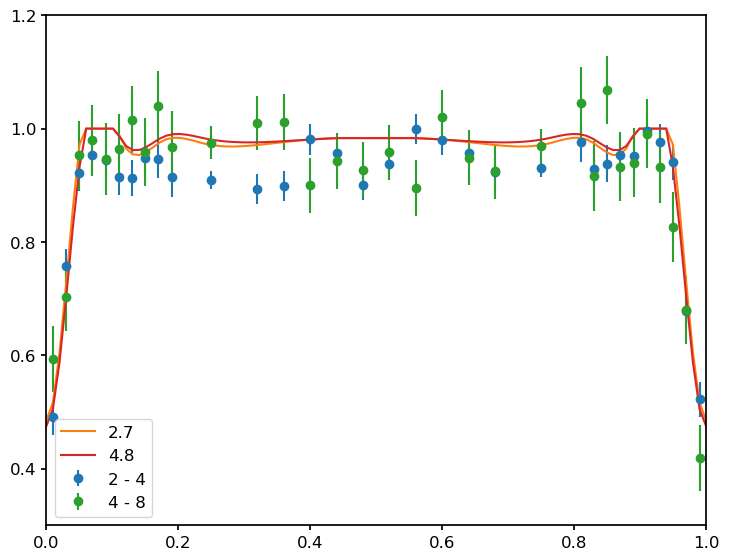

In [15]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, pol_deg[i,:], pol_deg_err[i,:], fmt='o',
                         label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, magnetar.pol_deg(energy, phase),label='%2.1f' % energy        )
plt.legend()

## Plot the polarization angle

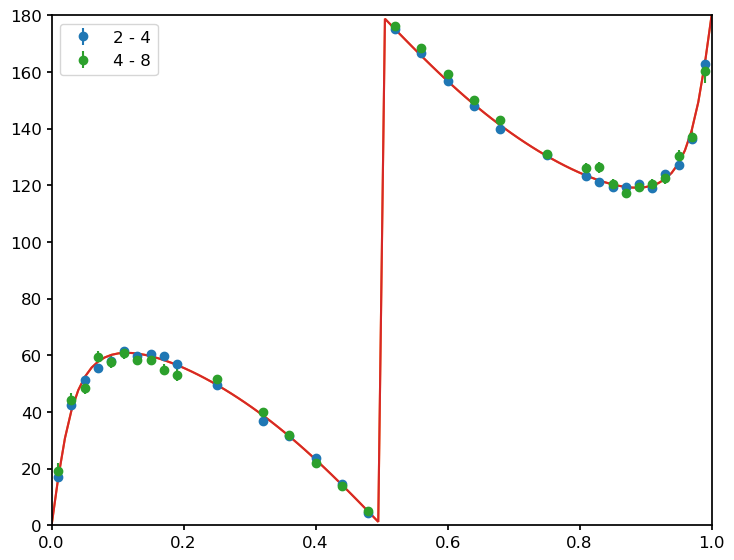

In [16]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, numpy.mod(pol_ang[i,:],180), pol_ang_err[i,:], fmt='o',
                     label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, numpy.degrees(magnetar.pol_ang(energy, phase) )    )
plt.legend()

# Look at phase-averaged polarization

## Create an MCUBE with finer energy bins

In [17]:
ENERGY_BINNING2 = numpy.array([2., 3., 4., 6., 8.])

pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING2,overwrite=True)

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631882R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631882R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   630451R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   630451R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits']

## Load the MCUBE data into Python

In [18]:
file_list = ['%s_mcube.fits'% (s[:-5],)   for s in folded_EVT_FILE_PATH]

mcube2 = xBinnedModulationCube.from_file_list(file_list)
pol_deg2 = mcube2.pol_deg
pol_deg2_err= mcube2.pol_deg_err
pol_ang2 = mcube2.pol_ang
pol_ang2_err = mcube2.pol_ang_err
emean2 = mcube2.energy_mean

>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


## Plot angle vs. energy

<ErrorbarContainer object of 3 artists>

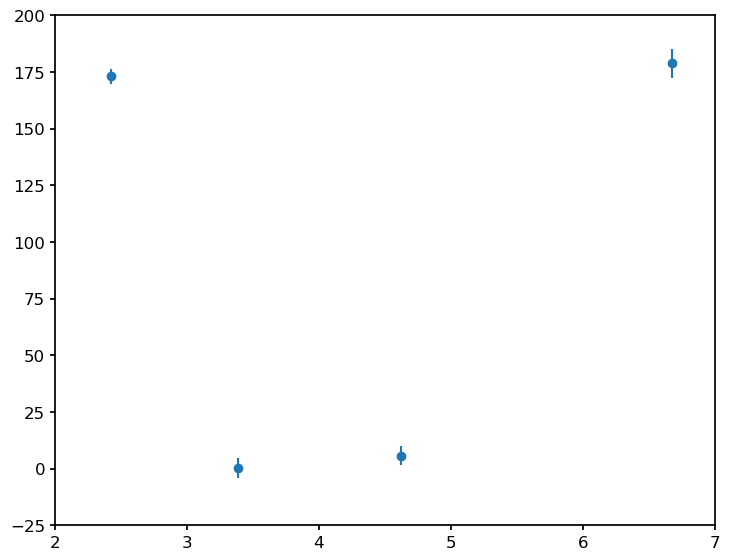

In [19]:
plt.errorbar(emean2, numpy.mod(pol_ang2,180), pol_ang2_err, fmt='o') 

## Plot polarization degree vs energy

<ErrorbarContainer object of 3 artists>

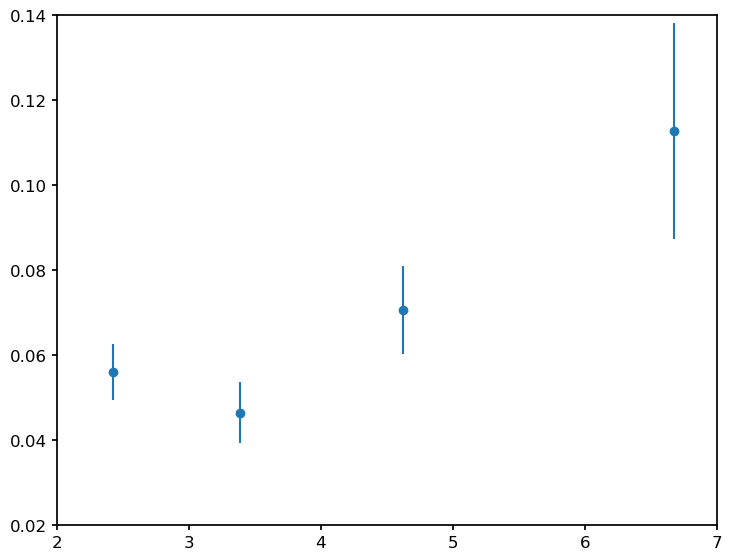

In [20]:
plt.errorbar(emean2, pol_deg2, pol_deg2_err, fmt='o')